# Test the trajectory generation functionality

In [90]:
using DifferentialEquations
using Plots 

In [91]:
include("trajectory_optimization.jl")

optimize_trajectory (generic function with 1 method)

In [92]:
dyn_sys = DynamicalSystem(vehicle_model, [2.0], [0., 0. , 0. , 0.0])
ctrls = 0.5 * randn(50, 2)

50×2 Matrix{Float64}:
  0.449027    0.0614579
 -0.200966    0.624007
  0.509134   -0.28437
 -0.240413    0.109472
 -0.172788    0.201385
 -0.369986    0.367733
  0.0839232  -0.132251
  0.556887   -0.664531
  0.311285   -0.408435
 -0.603594    0.662346
  ⋮          
 -0.660195   -0.662524
 -0.183017   -0.522135
 -0.107758   -0.482703
 -1.1291      0.0679788
  0.250819    0.580833
 -0.141348   -0.727503
 -0.438399    0.200001
 -0.213953    0.503047
 -0.0356334  -0.544148

In [93]:
(X, T) = generate_trajectory(dyn_sys,  ctrls, 0.1 )
print(size(X))

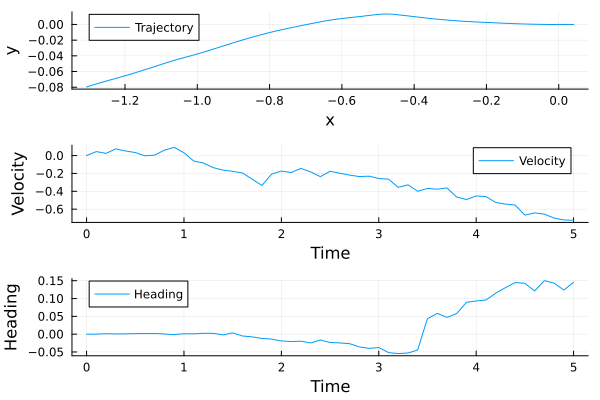

In [94]:
# create a plot with two subplots 

p1 = plot(X[:, 1], X[:, 2], label="Trajectory",  xlabel="x", ylabel="y")
p2 = plot(T, X[:,4],label="Velocity", xlabel="Time", ylabel="Velocity", label_location=:topright)
p3 = plot(T, X[:,3],label="Heading", xlabel="Time", ylabel="Heading", label_location=:topright)
plot(p1, p2, p3, layout=(3,1))

In [95]:
obstacle_locations = [
    [2.0, 1.0], 
    [6.0, 2.5],
    [10.0, 5.0]
]
waypoints =[ [i*0.5 + 0.005 * i^2, i*0.25] for i in 0:25]

target_velocity = 2.5
winfo = Workspace(obstacle_locations, waypoints, target_velocity)

(X, U, T) = optimize_trajectory_bbo(winfo, dyn_sys, 0.25, [(-1.0, 1.0), (-0.5, 0.5)], 50, [25.0, 10.0, 25.0, 10.0,  0.25, 0.25, 25.0, 10.0])

([0.0 0.0 0.0 0.0; 3.3607939287428915e-5 -1.33339934414195e-10 -7.935025904036196e-6 0.0026886351430225122; … ; 15.598634096748565 6.2382379885254915 0.40976502000797255 1.2786770812314705; 15.627777416259987 6.250780841972234 0.40308119002562637 1.2595553647105124], [0.10754540572090102 -0.44117062523619965; 0.6761243878253037 -0.3530076126842775; … ; -0.026829836055824403 0.4858122332321527; -0.7648686608383164 -0.39875110338994585], [0.0, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.225  …  12.275, 12.3, 12.325, 12.35, 12.375, 12.4, 12.425, 12.45, 12.475, 12.5])

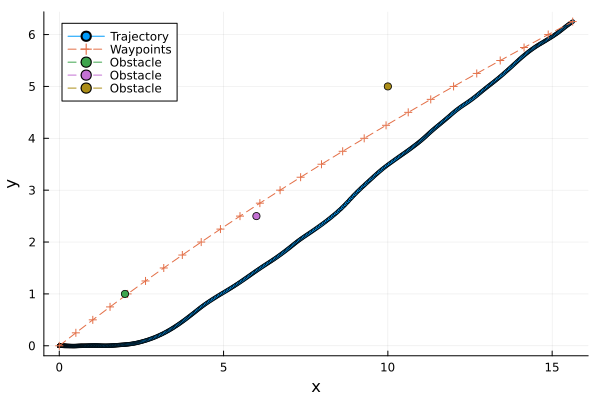

In [96]:
plot(X[:, 1], X[:, 2], label="Trajectory",  xlabel="x", ylabel="y",marker=:circle, markersize=2)
plot!([waypoints[i][1] for i in 1:length(waypoints)], [waypoints[i][2] for i in 1:length(waypoints)], marker=:cross, label="Waypoints", xlabel="x", ylabel="y", linestyle=:dash)
# plot each obstacle as a circle of radius 0.5
for obs in obstacle_locations
    plot!([obs[1]], [obs[2]], marker=:circle, label="Obstacle", xlabel="x", ylabel="y", linestyle=:dash, markersize=4)
end
plot!()
#p2 = plot(T, X[:,4],label="Velocity", xlabel="Time", ylabel="Velocity", label_location=:topright)
#p3 = plot(T, X[:,3],label="Heading", xlabel="Time", ylabel="Heading", label_location=:topright)
#plot(p1, p2, p3, layout=(3,1))

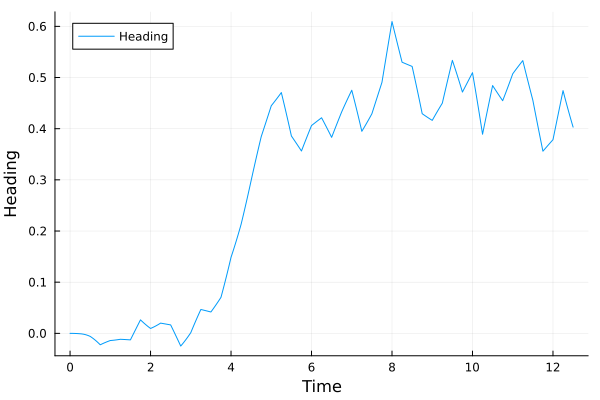

In [97]:
plot(T, X[:,3],label="Heading", xlabel="Time", ylabel="Heading", label_location=:topright)

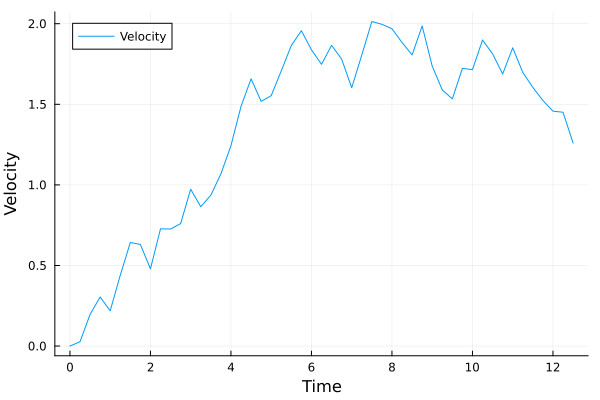

In [98]:
plot(T, X[:,4],label="Velocity", xlabel="Time", ylabel="Velocity", label_location=:topright)


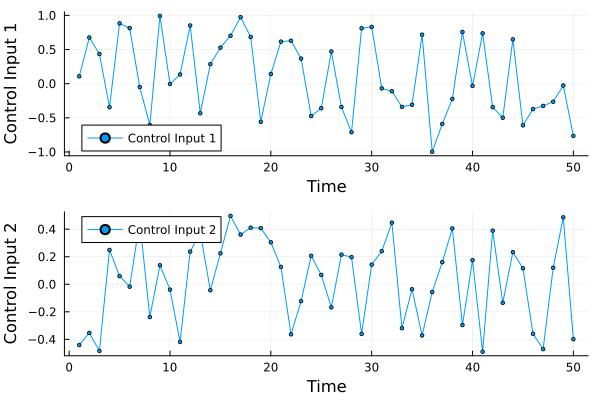

In [99]:

p1 = plot(U[:,1],label="Control Input 1", xlabel="Time", ylabel="Control Input 1", label_location=:topright, marker=:circle, markersize=2)
p2 = plot(U[:,2],label="Control Input 2", xlabel="Time", ylabel="Control Input 2", label_location=:topright, marker=:circle, markersize=2)
plot(p1, p2, layout=(2,1))